In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss, classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.filterwarnings("ignore", message="scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate.")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train = pd.read_csv('/kaggle/input/Train.csv')
test = pd.read_csv('/kaggle/input/Test.csv')
SampleSubmission = pd.read_csv('/kaggle/input/SampleSubmission.csv')
SubmissionFormat = pd.read_csv('/kaggle/input/Submission_Format.csv')

In [3]:
train.head()

,ID,Date,eNodeB Name,Frequency band,Cell FDD TDD Indication,Cell Name,Downlink EARFCN,Downlink bandwidth,LocalCell Id,Latitude,...,RRC Emergency SR,RRC High Priority SR(%),RRC MOC SR(%),RRC MTC SR(%),RRC Succ rate(%),CSFB failure rate(%),E-RAB Resource Congestion Rate(%),RRC Resource Congestion Rate(%),AVE 4G/LTE UL USER THRPUT without Last TTI (Kbps),network_labels
0,ID_CCMVX,03-27-2024,NodeID_1880,3.0,CELL_FDD,NodeID_1880_C337,1600.0,CELL_BW_N100,6.0,36.7825,...,1.0,NaN,0.9992,1.0000,99.9493,0.2843,0.0,0.0000,1636.2594,Normal
1,ID_BKXZZ,04-18-2024,NodeID_0321,20.0,CELL_FDD,NodeID_0321_C603,6300.0,CELL_BW_N50,1.0,33.5246,...,NaN,NaN,0.9993,0.9999,99.9513,0.1333,0.0,0.0000,697.0279,Normal
2,ID_AIBPI,05-11-2024,NodeID_0123,1.0,CELL_FDD,NodeID_0123_C888,500.0,CELL_BW_N100,9.0,36.8524,...,NaN,NaN,0.9992,0.9998,99.9369,0.0000,0.0,0.0000,1549.8880,Normal
3,ID_BPWVK,08-12-2024,NodeID_0954,3.0,CELL_FDD,NodeID_0954_C1995,1600.0,CELL_BW_N100,4.0,36.4020,...,NaN,NaN,0.9996,1.0000,99.9774,0.0962,0.0,0.0000,5224.0418,Normal
4,ID_AEAFB,12-12-2024,NodeID_1232,42.0,CELL_TDD,NodeID_1232_C2599,43440.0,CELL_BW_N50,91.0,NaN,...,NaN,NaN,0.9996,0.9981,99.8606,NaN,0.0,0.0294,1639.6271,Normal


In [38]:
train.describe()

,Frequency band,Downlink EARFCN,LocalCell Id,Latitude,Longitude,FT_AVERAGE NB OF USERS (UEs RRC CONNECTED),FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%),FT_PHYSICAL RESOURCE BLOCKS LOAD UL,FT_4G/LTE DL TRAFFIC VOLUME (GBYTES),FT_4G/LTE UL TRAFFIC VOLUME (GBYTES),...,Nb S1 Add e-RAB Setup fail,RRC Emergency SR,RRC High Priority SR(%),RRC MOC SR(%),RRC MTC SR(%),RRC Succ rate(%),CSFB failure rate(%),E-RAB Resource Congestion Rate(%),RRC Resource Congestion Rate(%),AVE 4G/LTE UL USER THRPUT without Last TTI (Kbps)
count,1.652425e+06,1.652425e+06,1.652425e+06,1.350360e+06,1.350360e+06,1.652425e+06,1.652425e+06,1.652425e+06,1.652425e+06,1.652425e+06,...,1.652425e+06,112378.000000,8175.000000,1.652313e+06,1.652109e+06,1.652425e+06,1.381781e+06,1.652425e+06,1.652425e+06,1.652305e+06
mean,1.323343e+01,9.326782e+03,2.987399e+01,3.589968e+01,1.019284e+01,1.403463e+01,3.044929e+01,1.994019e+01,7.609107e+01,6.696867e+00,...,4.101393e+00,0.987497,0.980739,9.967354e-01,9.991418e-01,9.973893e+01,2.602874e-01,1.335094e-04,6.260560e-03,1.565710e+03
std,1.470544e+01,1.511305e+04,3.884132e+01,1.118529e+00,6.500884e-01,1.343862e+01,1.902964e+01,9.475933e+00,7.577992e+01,6.569570e+00,...,3.778136e+01,0.106470,0.133651,1.296480e-02,5.605586e-03,1.131110e+00,2.236586e+00,9.730551e-02,5.013318e-02,1.320791e+03
min,1.000000e+00,4.750000e+02,1.000000e+00,3.197750e+01,7.590800e+00,0.000000e+00,7.907000e-01,3.255300e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000,0.000000,3.630000e-02,7.140000e-02,3.864700e+00,-5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.475000e+03,4.000000e+00,3.515270e+01,1.005340e+01,3.882100e+00,1.436620e+01,1.255690e+01,1.795780e+01,1.658200e+00,...,0.000000e+00,1.000000,1.000000,9.976000e-01,9.995000e-01,9.981490e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.534545e+02
50%,3.000000e+00,1.600000e+03,7.000000e+00,3.640060e+01,1.021660e+01,1.006390e+01,2.771020e+01,1.857910e+01,5.191710e+01,4.633100e+00,...,0.000000e+00,1.000000,1.000000,9.990000e-01,9.998000e-01,9.991980e+01,8.450000e-02,0.000000e+00,0.000000e+00,1.252466e+03
75%,2.000000e+01,6.300000e+03,5.300000e+01,3.682330e+01,1.067100e+01,2.056630e+01,4.378630e+01,2.502080e+01,1.119901e+02,9.949800e+00,...,0.000000e+00,1.000000,1.000000,9.995000e-01,1.000000e+00,9.996170e+01,2.516000e-01,0.000000e+00,0.000000e+00,1.965372e+03
max,4.200000e+01,4.344000e+04,2.440000e+02,3.733120e+01,1.155630e+01,2.938049e+02,9.928450e+01,8.804930e+01,7.098455e+02,2.303715e+02,...,2.427000e+03,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+02,8.743630e+01,2.000000e+01,5.331754e+04


In [4]:
train.isna().sum()

ID                                                                         0
Date                                                                       0
eNodeB Name                                                                0
 Frequency band                                                            0
Cell FDD TDD Indication                                                    0
Cell Name                                                                  0
Downlink EARFCN                                                            0
Downlink bandwidth                                                         0
LocalCell Id                                                               0
Latitude                                                              302065
Longitude                                                             302065
Integrity                                                                  0
FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)                                 0

In [5]:
train.nunique()

ID                                                                   1652425
Date                                                                     300
eNodeB Name                                                             2941
 Frequency band                                                            4
Cell FDD TDD Indication                                                    2
Cell Name                                                            1652425
Downlink EARFCN                                                           13
Downlink bandwidth                                                         4
LocalCell Id                                                              86
Latitude                                                                2054
Longitude                                                               2033
Integrity                                                                 24
FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)                            423094

In [6]:
train['network_labels'].unique()

array(['Normal', 'Low Throughput', 'Bad Response Rate', 'High TA',
       'Bad Congestion', 'Bad Response Rate, Low Throughput',
       'Bad Congestion, High TA', 'Bad Response Rate, High Traffic',
       'Bad Congestion, Low Throughput',
       'Bad Congestion, Bad Response Rate', 'Severe Congestion',
       'Severe Response Rate, Low Throughput',
       'Severe Response Rate, Very Low Throughput, Low PRB per User',
       'Severe Congestion, Low Throughput', 'Very Low Throughput',
       'Bad Congestion, Bad Response Rate, Low Throughput',
       'Low PRB per User', 'Severe Response Rate',
       'Bad Congestion, Severe Response Rate, Low Throughput',
       'Severe Congestion, High TA',
       'Bad Congestion, Severe Response Rate, Very Low Throughput',
       'High Traffic', 'Severe Congestion, Low Throughput, High TA',
       'Very Low PRB per User', 'Low Throughput, High TA',
       'Bad Response Rate, Low Throughput, High TA',
       'Bad Congestion, Severe Response Rate',
     

In [7]:
SubmissionFormat.head()

,ID,Bad Congestion,Bad Response Rate,High TA,High Traffic,Low PRB per User,Low Throughput,Normal,Severe Congestion,Severe Response Rate,Very High TA,Very Low PRB per User,Very Low Throughput
0,ID_EMRUZ,0,1,0,0,0,0,0,0,0,0,0,0
1,ID_DTXUO,0,1,0,0,0,1,0,0,0,0,0,0


In [9]:
# Transform comma-separated labels into a list format
train['network_labels_list'] = train['network_labels'].str.split(',').apply(lambda x: [label.strip() for label in x])

# Get all unique labels from the dataset
all_labels = set()
for labels in train['network_labels_list']:
    all_labels.update(labels)
all_labels = sorted(list(all_labels))
print(f"Found {len(all_labels)} unique labels: {all_labels}")

# One-hot encode the labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=all_labels)
y_encoded = mlb.fit_transform(train['network_labels_list'])

# Create a DataFrame with one-hot encoded labels for visualization
y_df = pd.DataFrame(y_encoded, columns=mlb.classes_)
print("\nOne-hot encoded labels (first 5 rows):")


Found 12 unique labels: ['Bad Congestion', 'Bad Response Rate', 'High TA', 'High Traffic', 'Low PRB per User', 'Low Throughput', 'Normal', 'Severe Congestion', 'Severe Response Rate', 'Very High TA', 'Very Low PRB per User', 'Very Low Throughput']

One-hot encoded labels (first 5 rows):


In [10]:
train.columns

Index(['ID', 'Date', 'eNodeB Name', ' Frequency band',
       'Cell FDD TDD Indication', 'Cell Name', 'Downlink EARFCN',
       'Downlink bandwidth', 'LocalCell Id', 'Latitude', 'Longitude',
       'Integrity', 'FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)',
       'FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)',
       'FT_PHYSICAL RESOURCE BLOCKS LOAD UL',
       'FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)',
       'FT_4G/LTE UL TRAFFIC VOLUME (GBYTES)',
       'FT_4G/LTE AVERAGE REPORTED CQI', 'FT_4G/LTE PAGING DISCARD RATE',
       'FT_4G/LTE RADIO DOWNLINK DELAY(ms)',
       'FT_4G/LTE VOLTE TRAFFIC VOLUME (GBYTES)',
       'FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)',
       'FT_AVERAGE NB OF CA UEs RRC CONNECTED(number)',
       'FT_AVERAGE NUMBER OF UE QUEUED UL', 'FT_S1 SUCCESS RATE',
       'FT_UL.Interference', 'Average Nb of e-RAB per UE',
       'Average Nb of Used PRB for SRB',
       'FT_AVERAGE NUMBER OF UE SCHEDULED PER ACTIVE TTI DL (FDD)(number)',
       'FT_AVERAGE NUMBER OF UE SCH

In [12]:
# Select only numeric columns for our features
numeric_cols = train.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns

# Filter out the target columns
feature_cols = [col for col in numeric_cols if col != 'network_labels']

feature_cols

[' Frequency band',
 'Downlink EARFCN',
 'LocalCell Id',
 'Latitude',
 'Longitude',
 'FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)',
 'FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)',
 'FT_PHYSICAL RESOURCE BLOCKS LOAD UL',
 'FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)',
 'FT_4G/LTE UL TRAFFIC VOLUME (GBYTES)',
 'FT_4G/LTE AVERAGE REPORTED CQI',
 'FT_4G/LTE PAGING DISCARD RATE',
 'FT_4G/LTE RADIO DOWNLINK DELAY(ms)',
 'FT_4G/LTE VOLTE TRAFFIC VOLUME (GBYTES)',
 'FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)',
 'FT_AVERAGE NB OF CA UEs RRC CONNECTED(number)',
 'FT_AVERAGE NUMBER OF UE QUEUED UL',
 'FT_S1 SUCCESS RATE',
 'FT_UL.Interference',
 'Average Nb of e-RAB per UE',
 'Average Nb of Used PRB for SRB',
 'FT_AVERAGE NUMBER OF UE SCHEDULED PER ACTIVE TTI DL (FDD)(number)',
 'FT_AVERAGE NUMBER OF UE SCHEDULED PER ACTIVE TTI UL (TDD)',
 'FT_CS FALLBACK SUCCESS RATE (4G SIDE ONLY)',
 'FT_CS FALLBACK TO WCDMA RATIO',
 'FT_ERAB SETUP SUCCESS RATE',
 'FT_ERAB SETUP SUCCESS RATE (ALL)(%)',
 'FT_ERAB SETUP SUCCES

In [128]:
def train_preprocess(df):
    df['Integrity'] = (df['Integrity'].astype(str).str.rstrip('%').astype(float) / 100)
    df["eNodeB_numeric"] = df["eNodeB Name"].str.extract(r'(\d+)').astype(int)
    # Bandwidth encoding
    bw_mapping = {
        'CELL_BW_N100': 100,
        'CELL_BW_N75': 75,
        'CELL_BW_N50': 50,
        'CELL_BW_N25': 25
    }
    df['Downlink bandwidth'] = df['Downlink bandwidth'].map(bw_mapping)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    #Drop almost NaN columns

    # Trying new features
    df['PRB_Utilization_Ratio'] = df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD UL'] + 1e-6)
    df['Traffic_per_User'] = df['FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)'] / (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    
    # Efficiency Metrics
    df['Throughput_per_PRB'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    df['Spectral_Efficiency'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] / (df['Downlink bandwidth'] + 1e-6)
    
    # Quality Metrics
    df['CQI_to_Interference_Ratio'] = df['FT_4G/LTE AVERAGE REPORTED CQI'] / (abs(df['FT_UL.Interference']) + 1e-6)
    df['Delay_to_Throughput_Ratio'] = df['FT_4G/LTE RADIO DOWNLINK DELAY(ms)'] / (df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] + 1e-6)
    
    # Mobility Metrics
    df['HO_Failure_Rate'] = (df['Nb HO fail to GERAN'] + df['Nb HO fail to UTRA FDD']) / \
                       (df['Nb of HO over S1 for e-RAB Req'] + df['Nb of HO over X2 for e-RAB Succ'] + 1e-6)
    
    # Connection Stability Metrics
    df['RRC_Drop_Rate'] = df['Nb of RRC connection release'] / (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    df['eRAB_Failure_Rate'] = df['Nb e-RAB Setup Fail'] / (df['Nb initial e-RAB Setup Succ'] + df['Nb e-RAB Setup Fail'] + 1e-6)
    
    # Congestion Indicators
    df['Congestion_Score'] = 0.5*df['E-RAB Resource Congestion Rate(%)'] + \
                       0.3*df['RRC Resource Congestion Rate(%)'] + \
                       0.2*df['FT_AVERAGE NUMBER OF UE QUEUED UL']
    # Load bucket
    df['UEs_per_PRB_DL']    = df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    
    # Traffic bucket
    df['DL_per_UE']         = df['FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)'] / (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    
    # Throughput bucket
    df['DL_thrput_per_PRB'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    
    # Quality bucket
    df['CQI_to_delay']      = df['FT_4G/LTE AVERAGE REPORTED CQI'] / (df['FT_4G/LTE RADIO DOWNLINK DELAY(ms)'] + 1e-6)
    
    # Signaling bucket
    df['eRAB_fail_rate']    = 1 - (df['FT_ERAB SETUP SUCCESS RATE'] / 100)
    
    # Mobility bucket
    df['HO_fail_ratio']     = df['Nb HO fail to UTRA FDD'] / (df['Nb of HO over S1 for e-RAB Req'] + 1e-6)
    # Congestion bucket
    df['eRAB_congest_flag'] = (df['E-RAB Resource Congestion Rate(%)'] > 80).astype(int)

    df = df.drop(columns=["Nb of HO over S1 for e-RAB Req",'RRC Emergency SR', "RRC High Priority SR(%)"])

    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    return(df, numerical_cols)








def test_preprocess(df):
    df['Integrity'] = (df['Integrity'].astype(str).str.rstrip('%').astype(float) / 100)
    df["eNodeB_numeric"] = df["eNodeB Name"].str.extract(r'(\d+)').astype(int)
    # Bandwidth encoding
    bw_mapping = {
        'CELL_BW_N100': 100,
        'CELL_BW_N75': 75,
        'CELL_BW_N50': 50,
        'CELL_BW_N25': 25
    }
    df['Downlink bandwidth'] = df['Downlink bandwidth'].map(bw_mapping)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    #Drop almost NaN columns
    
    #Testing thing
    df['PRB_Utilization_Ratio'] = df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD UL'] + 1e-6)
    df['Traffic_per_User'] = df['FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)'] / (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    
    # Efficiency Metrics
    df['Throughput_per_PRB'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    df['Spectral_Efficiency'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] / (df['Downlink bandwidth'] + 1e-6)
    
    # Quality Metrics
    df['CQI_to_Interference_Ratio'] = df['FT_4G/LTE AVERAGE REPORTED CQI'] / (abs(df['FT_UL.Interference']) + 1e-6)
    df['Delay_to_Throughput_Ratio'] = df['FT_4G/LTE RADIO DOWNLINK DELAY(ms)'] / (df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] + 1e-6)
    
    # Mobility Metrics
    df['HO_Failure_Rate'] = (df['Nb HO fail to GERAN'] + df['Nb HO fail to UTRA FDD']) / \
                       (df['Nb of HO over S1 for e-RAB Req'] + df['Nb of HO over X2 for e-RAB Succ'] + 1e-6)
    
    # Connection Stability Metrics
    df['RRC_Drop_Rate'] = df['Nb of RRC connection release'] / \
                     (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    df['eRAB_Failure_Rate'] = df['Nb e-RAB Setup Fail'] / \
                         (df['Nb initial e-RAB Setup Succ'] + df['Nb e-RAB Setup Fail'] + 1e-6)
    
    # Congestion Indicators
    df['Congestion_Score'] = 0.5*df['E-RAB Resource Congestion Rate(%)'] + \
                       0.3*df['RRC Resource Congestion Rate(%)'] + \
                       0.2*df['FT_AVERAGE NUMBER OF UE QUEUED UL']
  
    
    #Drop almost NaN columns
    # df = df.drop(['RRC High Priority SR(%)', "RRC Emergency SR"], axis = "columns")

            # Load bucket
    df['UEs_per_PRB_DL']    = df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] \
                               / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    
    # Traffic bucket
    df['DL_per_UE']         = df['FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)'] \
                               / (df['FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)'] + 1e-6)
    
    # Throughput bucket
    df['DL_thrput_per_PRB'] = df['FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)'] \
                               / (df['FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)'] + 1e-6)
    
    # Quality bucket
    df['CQI_to_delay']      = df['FT_4G/LTE AVERAGE REPORTED CQI'] \
                               / (df['FT_4G/LTE RADIO DOWNLINK DELAY(ms)'] + 1e-6)
    
    # Signaling bucket
    df['eRAB_fail_rate']    = 1 - (df['FT_ERAB SETUP SUCCESS RATE'] / 100)
    
    # Mobility bucket
    df['HO_fail_ratio']     = df['Nb HO fail to UTRA FDD'] \
                               / (df['Nb of HO over S1 for e-RAB Req'] + 1e-6)
    
    # Congestion bucket
    df['eRAB_congest_flag'] = (df['E-RAB Resource Congestion Rate(%)'] > 80).astype(int)

    df = df.drop(columns=["Nb of HO over S1 for e-RAB Req", 'RRC Emergency SR', "RRC High Priority SR(%)"])

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    return(df, numerical_cols)

    

In [129]:
train_df=train.copy()
test_df = test.copy()
print("train_df type= ", type(train_df))
print("test_df type= ", type(test_df))

train_df type=  <class 'pandas.core.frame.DataFrame'>
test_df type=  <class 'pandas.core.frame.DataFrame'>


In [130]:
(train_cleaned, numerical_cols) = train_preprocess(train_df)
(test_cleaned, numerical_cols) = test_preprocess(test_df)
# Prepare final X with all cleaned numerical features
X=train_cleaned[numerical_cols]
# Optional: check result


print(f"Shape of X: {X.shape}")
print("Any NaNs left?", X.isnull().any().any())


# If bandwidth turns out completely NaN, then it should be due to a double execution of train_preprocess
# Restart kernel to fix

Shape of X: (1652425, 68)
Any NaNs left? False


In [131]:
X.head()

,Frequency band,Downlink EARFCN,Downlink bandwidth,LocalCell Id,Latitude,Longitude,Integrity,FT_AVERAGE NB OF USERS (UEs RRC CONNECTED),FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%),FT_PHYSICAL RESOURCE BLOCKS LOAD UL,...,RRC_Drop_Rate,eRAB_Failure_Rate,Congestion_Score,UEs_per_PRB_DL,DL_per_UE,DL_thrput_per_PRB,CQI_to_delay,eRAB_fail_rate,HO_fail_ratio,eRAB_congest_flag
0,3.0,1600.0,100,6.0,36.7825,10.2841,1.0,14.6102,26.6619,10.5491,...,5462.758521,0.000588,0.16076,0.547980,4.685781,719.109440,0.354211,0.000588,0.0,0
1,20.0,6300.0,50,1.0,33.5246,11.0856,1.0,7.0134,23.8931,16.8217,...,5305.414591,0.000360,0.14442,0.293532,4.908075,570.387812,0.213877,0.000360,0.0,0
2,1.0,500.0,100,9.0,36.8524,10.1843,1.0,18.9628,42.6109,17.5046,...,6704.916642,0.000974,0.19220,0.445022,4.521347,426.047299,0.090010,0.000984,0.0,0
3,3.0,1600.0,100,4.0,36.4020,10.6359,1.0,14.6883,21.0284,10.9227,...,4260.601686,0.000527,0.12788,0.698498,5.108923,1314.470396,0.290529,0.000527,0.0,0
4,42.0,43440.0,50,91.0,36.4006,10.2166,1.0,8.5189,36.3694,34.8945,...,1738.604545,0.010168,0.22334,0.234233,13.245922,832.982039,0.169469,0.010162,0.0,0


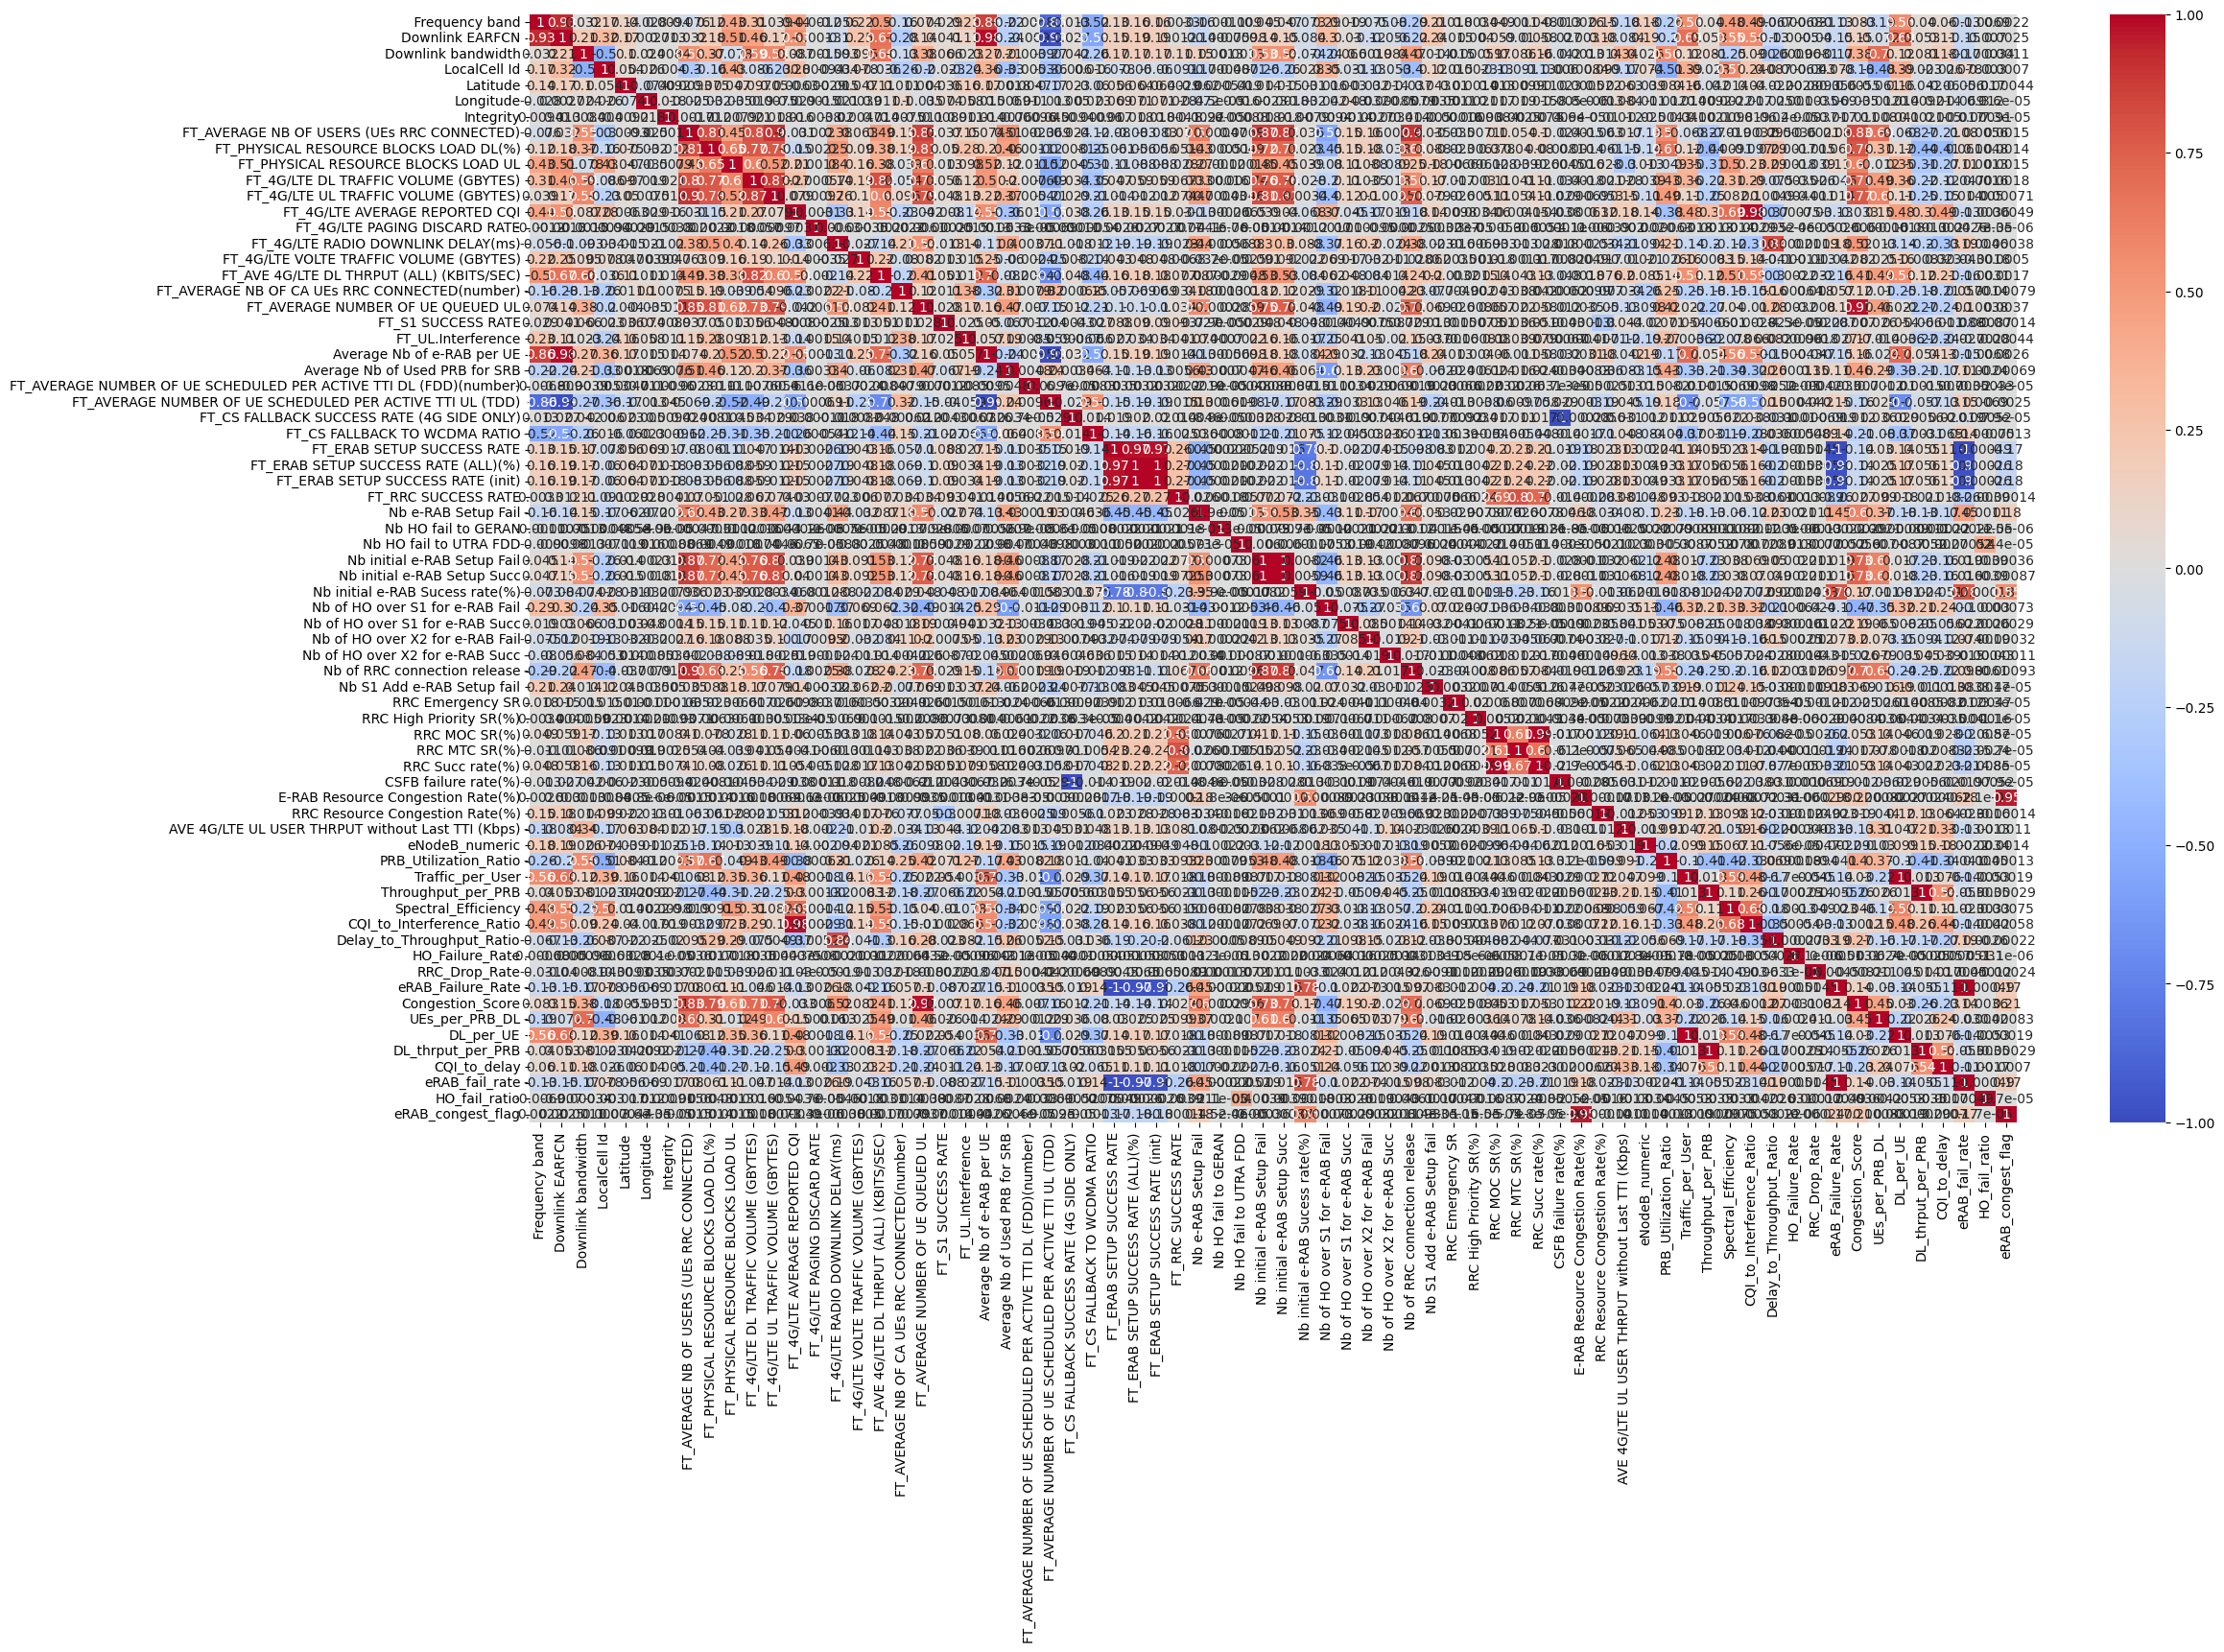

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [133]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=42)

In [ ]:

warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier




base_model = XGBClassifier(
    tree_method='gpu_hist',   # or 'hist' if no GPU
    predictor='gpu_predictor',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.08,
    subsample=0.8,
    colsample_bytree=0.8,
    verbosity=1
)
from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     "estimator__n_estimators": [100, 200, 300],
#     "estimator__max_depth": [4, 6, 8],
#     "estimator__learning_rate": [0.01, 0.05, 0.1],
#     "estimator__subsample": [0.7, 0.8, 1.0],
#     "estimator__colsample_bytree": [0.7, 0.8, 1.0]
# }

param_grid = {
    "estimator__n_estimators": [300],
    "estimator__max_depth": [8],
    "estimator__learning_rate": [0.05],
    "estimator__subsample": [0.8],
    "estimator__colsample_bytree": [0.8]
}

# search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_grid,
#     n_iter=10,
#     scoring='f1_micro',  # Or 'hamming_loss' (lower is better)
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)



MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.08, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor='gpu_predictor', ...))

In [135]:
from sklearn.multioutput import ClassifierChain

chains = [ClassifierChain(XGBClassifier(n_estimators=100)) for _ in range(3)]
for chain in chains:
    chain.fit(X_train, y_train)


In [137]:
import numpy as np

# Predict with each chain
y_preds = np.array([chain.predict(X_test) for chain in chains])  # shape: (n_chains, n_samples, n_labels)

# Majority voting across chains
y_pred_ensemble = (y_preds.mean(axis=0) >= 0.5).astype(int)


In [138]:
from sklearn.metrics import hamming_loss

hl = hamming_loss(y_test, y_pred_ensemble)
print(f"Validation Hamming Loss: {hl:.4f}")


Validation Hamming Loss: 0.0020


In [136]:
test_df = test_cleaned[numerical_cols].copy()
test_df.columns

Index([' Frequency band', 'Downlink EARFCN', 'Downlink bandwidth',
       'LocalCell Id', 'Latitude', 'Longitude', 'Integrity',
       'FT_AVERAGE NB OF USERS (UEs RRC CONNECTED)',
       'FT_PHYSICAL RESOURCE BLOCKS LOAD DL(%)',
       'FT_PHYSICAL RESOURCE BLOCKS LOAD UL',
       'FT_4G/LTE DL TRAFFIC VOLUME (GBYTES)',
       'FT_4G/LTE UL TRAFFIC VOLUME (GBYTES)',
       'FT_4G/LTE AVERAGE REPORTED CQI', 'FT_4G/LTE PAGING DISCARD RATE',
       'FT_4G/LTE RADIO DOWNLINK DELAY(ms)',
       'FT_4G/LTE VOLTE TRAFFIC VOLUME (GBYTES)',
       'FT_AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC)',
       'FT_AVERAGE NB OF CA UEs RRC CONNECTED(number)',
       'FT_AVERAGE NUMBER OF UE QUEUED UL', 'FT_S1 SUCCESS RATE',
       'FT_UL.Interference', 'Average Nb of e-RAB per UE',
       'Average Nb of Used PRB for SRB',
       'FT_AVERAGE NUMBER OF UE SCHEDULED PER ACTIVE TTI DL (FDD)(number)',
       'FT_AVERAGE NUMBER OF UE SCHEDULED PER ACTIVE TTI UL (TDD)',
       'FT_CS FALLBACK SUCCESS RATE (4G SID

In [139]:


y_preds = np.array([chain.predict(test_df) for chain in chains])  # shape: (n_chains, n_samples, n_labels)

# Majority voting across chains
test_predictions_encoded = (y_preds.mean(axis=0) >= 0.5).astype(int)



# test_predictions_encoded = model.predict(test_df)

# Make predictions on test data
# test_predictions_encoded = model.predict(X_test_submission)

# Create submission DataFrame with ID column
submission_df = pd.DataFrame({'ID': test['ID']})

# Add columns for each label
for i, label in enumerate(mlb.classes_):
    submission_df[label] = test_predictions_encoded[:, i]

# Save predictions in one-hot format (required for Hamming loss)
submission_df.to_csv('submission_indaba.csv', index=False)
print(f"Predictions saved to 'submission.csv' with shape: {submission_df.shape}")


Predictions saved to 'submission.csv' with shape: (528186, 13)


In [55]:
import joblib

# Save the model
joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']